# Sampling a GP on a Hyperbolic space

Let's draw some samples from a Gaussian process on a Hyperbolic space!

In [1]:
# !pip install backends==1.4.32 plum-dispatch==1.7.4

In [2]:
# Import a backend.
import numpy as np
# Import the geometric_kernels backend.
import geometric_kernels
# # Import a space and an appropriate kernel.
from geometric_kernels.spaces.hyperbolic import Hyperbolic
from geometric_kernels.kernels.geometric_kernels import MaternKarhunenLoeveKernel
from geometric_kernels.kernels.feature_maps import random_phase_feature_map
# # import sampler
from geometric_kernels.sampling import sampler

INFO: Using numpy backend


In [3]:
import geomstats.visualization as visualization

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Define a manifold and build some grid on it:

In [5]:
# Create a manifold (2-dim sphere).
hyperboloid = Hyperbolic(dim=2)

In [6]:
s = np.linspace(-5, 5, 25)
xx, yy = np.meshgrid(s, s)
points = np.c_[xx.ravel(), yy.ravel()]
points = hyperboloid.from_coordinates(points, "intrinsic")

In [7]:
params, state = {}, {}
params["nu"] = 3.0/2.0
params["lengthscale"] = 0.1

Let's see what we've got:

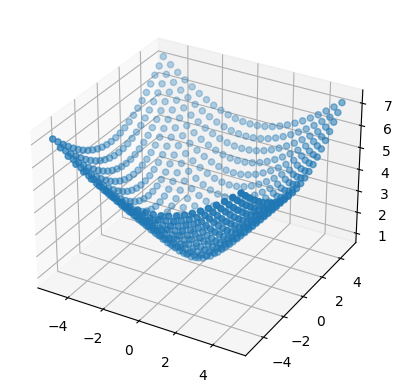

In [8]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(points[:, 2], points[:, 1], points[:, 0])

In [9]:
# introduce random state for reproducibility (optional)
# `key` is jax's terminology
key = np.random.RandomState(seed=1234)

In [10]:
import lab as B

In [11]:
import numpy as np

In [12]:
# compute feature map for this space and kernel
feature_map, context = random_phase_feature_map(hyperboloid, None, params, state, key, 100)

In [13]:
hyperboloid.dimension

2

In [14]:
n_samples = 4
sample_paths = sampler(feature_map, s=n_samples)

Now, `sample_paths` is a *deterministic* function of `X`, if we prodive thesame key. It is not necessary, although recommended, to pass the key.

Let's actually evaluate the sample paths on our spherical grid `Xs` and see what we've got:

In [15]:
key, samples = sample_paths(points, key=key)  # new random state is returned along with the samples

(array([  1.,   2.,   8.,  86., 409., 102.,   9.,   4.,   2.,   2.]),
 array([-3129.38896308, -2432.91190395, -1736.43484481, -1039.95778568,
         -343.48072655,   352.99633259,  1049.47339172,  1745.95045085,
         2442.42750999,  3138.90456912,  3835.38162826]),
 <BarContainer object of 10 artists>)

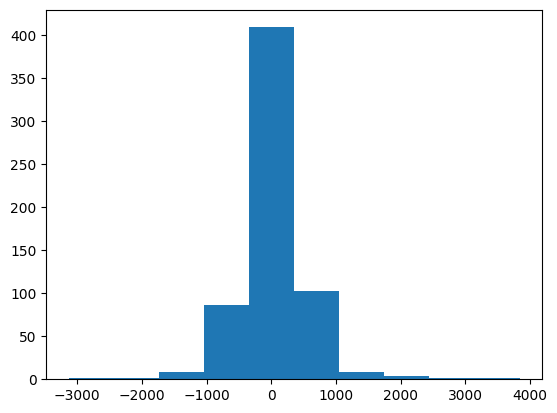

In [16]:
plt.hist(samples[:,0])  # wtf

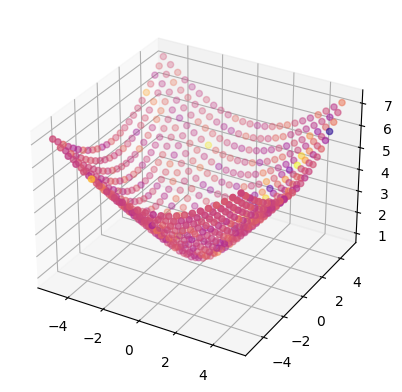

In [17]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(points[:, 2], points[:, 1], points[:, 0], c=samples[:, 0], cmap='plasma', vmin=-2500, vmax=2500)